# Sorting algorithms

1. mergesort
2. quick sort

## Recursive Merge Sort

Time complexity: 

Best:  $O(n * log (n))$

Worst: $O(n * log (n))$

In [23]:
import numpy as np
import time
import matplotlib.pyplot as plt

def mergeSortRecursive_merge(a, left, mid, right):
    it1 = 0
    it2 = 0
    result = [i for i in range(right)]
    
    while (left + it1 < mid) and (mid + it2 < right):
        if a[left + it1] < a[mid + it2]:
            result[it1+it2] = a[left + it1]
            it1 += 1
        else:
            result[it1 + it2] = a[mid + it2]
            it2 += 1
    
    while left + it1 < mid:
        result[it1 + it2] = a[left + it1]
        it1 += 1
    
    while mid + it2 < right:
        result[it1 + it2] = a[mid + it2]
        it2 += 1
    
    for i in range(it1+it2):
        a[left+i] = result[i]

def mergeSortRecursive(a, left, right):
    if left + 1 >= right:
        return
    mid = round((left + right) / 2)
    mergeSortRecursive(a, left, mid)
    mergeSortRecursive(a, mid, right)
    mergeSortRecursive_merge(a, left, mid, right)

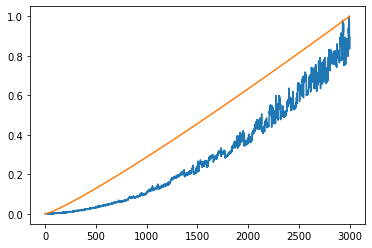

In [24]:
x, y, y1 = [], [], []    
n = 3000
for i in range(1, n):        
    x.append(i)
    arr = np.random.randint(0, 1000, i).tolist()
    arr_len = len(arr)
    start_time = time.time()
    mergeSortRecursive(arr, 0, arr_len)
    end_time = time.time() - start_time
    y.append(end_time)
    y1.append(i * np.log(i))

y_max = max(y)
y1_max = max(y1)
y = [el/y_max for el in y]
y1 = [el/y1_max for el in y1]
plt.plot(x, y)
plt.plot(x, y1)

In [16]:
import numpy as np
import time
import matplotlib.pyplot as plt

def mergeSortRecursive2_merge(x, y):
    if len(x) == 0:
        return y
    if len(y) == 0:
        return x
    if x[0] <= y[0]:
        return x[:1] + mergeSortRecursive2_merge(x[1:], y)
    if x[0] > y[0]:
        return y[:1] + mergeSortRecursive2_merge(x, y[1:])

def mergeSortRecursive2(a):
    m = round(len(a)/2)
    if len(a) > 1:
        return mergeSortRecursive2_merge(mergeSortRecursive2(a[:m]), mergeSortRecursive2(a[m:]))
    else:
        return a

In [17]:
arr = np.random.randint(0, 1000, 15).tolist()
print(f"random list: {arr}")
sorted_arr = mergeSortRecursive2(arr)
print(f"sorted list: {sorted_arr}")

random list: [104, 511, 446, 836, 781, 284, 931, 12, 507, 366, 249, 666, 517, 423, 56]
sorted list: [12, 56, 104, 249, 284, 366, 423, 446, 507, 511, 517, 666, 781, 836, 931]


In [15]:
x, y, y1 = [], [], []    
n = 3000
for i in range(1, n):        
    x.append(i)
    arr = np.random.randint(0, 1000, i).tolist()
    arr_len = len(arr)
    start_time = time.time()
    mergeSortRecursive2(arr)
    end_time = time.time() - start_time
    y.append(end_time)
    y1.append(i * np.log(i))

y_max = max(y)
y1_max = max(y1)
y = [el/y_max for el in y]
y1 = [el/y1_max for el in y1]
plt.plot(x, y)
plt.plot(x, y1)

RecursionError: maximum recursion depth exceeded while calling a Python object

## Iterative Merge Sort with queue

Time complexity: 

Best:  $O(n * log (n))$

Worst: $O(n * log (n))$

In [33]:
import time
import matplotlib.pyplot as plt
import math

class iterativeMergeSort_queue:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def inject(self, item):
        self.items.insert(0, item)
    def eject(self):
        return self.items.pop()
    def size(self):
        return len(self.items)

def iterativeMergeSort_merge(x, y):
    res = []
    len_x = len(x)
    len_y = len(y)
    counter_x = 0
    counter_y = 0
    while True:
        if x[counter_x] <= y[counter_y]:
            res.append(x[counter_x])
            counter_x += 1
        else:
            res.append(y[counter_y])
            counter_y += 1
        if counter_x == len_x:
            res += y[counter_y:]
            break
        if counter_y == len_y:
            res += x[counter_x:]
            break
    return res
            

def iterativeMergeSortWithQueue(a):
    q = iterativeMergeSort_queue()
    [q.inject([el]) for el in a]
    while q.size() > 1:
        q.inject(iterativeMergeSort_merge(q.eject(), q.eject()))
    return q.eject()

In [34]:
#generate list of 15 random integers for testing
arr = np.random.randint(0, 1000, 15).tolist()
print(f"random list: {arr}")
sorted_arr = iterativeMergeSortWithQueue(arr)
print(f"sorted list: {sorted_arr}")

random list: [173, 680, 291, 344, 687, 108, 714, 834, 562, 987, 335, 990, 908, 580, 404]
sorted list: [108, 173, 291, 335, 344, 404, 562, 580, 680, 687, 714, 834, 908, 987, 990]


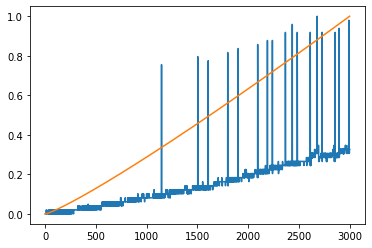

In [35]:
x, y, y1 = [], [], []    
n = 3000
for i in range(1, n):        
    x.append(i)
    arr = np.random.randint(0, 1000, i).tolist()
    arr_len = len(arr)
    start_time = time.time()
    iterativeMergeSortWithQueue(arr)
    end_time = time.time() - start_time
    y.append(end_time)
    y1.append(i * np.log(i))

y_max = max(y)
y1_max = max(y1)
y = [el/y_max for el in y]
y1 = [el/y1_max for el in y1]
plt.plot(x, y)
plt.plot(x, y1)

## Quick sort

Time complexity: 

Best: $O(n * log (n))$

Worst: $O(n^2)$

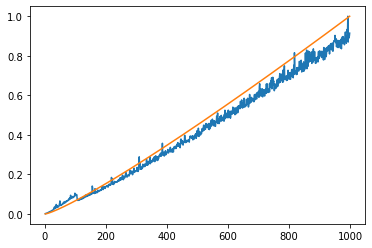

In [31]:
import time
import matplotlib.pyplot as plt
import math

def qSortRecursive_partition(a, low, high):
    pivot = a[(high+low)//2]
    i = low
    j = high
    while i <= j:
        while a[i] < pivot:         
            i += 1
        while a[j] > pivot:
            j -= 1

        if i >= j:
            break
        a_i = a[i]
        a[i] = a[j]
        a[j] = a_i
        i += 1
        j -= 1
    return j
        
def qSortRecursive(a, l, h):
    if l < h:
        p = qSortRecursive_partition(a, l, h)
        qSortRecursive(a, l, p)
        qSortRecursive(a, p+1, h)

x, y, y1 = [], [], []    
n = 1000
for i in range(1, n):        
    x.append(i)
    arr = np.random.randint(0, 1000, i).tolist()
    arr_len = len(arr)
    start_time = time.time()
    qSortRecursive(arr, 0, arr_len-1)
    end_time = time.time() - start_time
    y.append(end_time)
    y1.append(i * math.log(i))

y_max = max(y)
y1_max = max(y1)
y = [el/y_max for el in y]
y1 = [el/y1_max for el in y1]
plt.plot(x, y)
plt.plot(x, y1)

In [12]:
arr = np.random.randint(0, 5400, 2000).tolist()
print(arr)
new_arr = iterativeMergeSort(arr)
print(new_arr)

[3362, 1278, 1959, 3453, 1454, 989, 5226, 99, 2582, 4065, 328, 2983, 3628, 776, 136, 3042, 2703, 4952, 129, 397, 4597, 2723, 4633, 2745, 5301, 977, 932, 609, 4315, 958, 49, 2872, 3838, 294, 576, 2947, 241, 3603, 909, 5240, 3130, 2637, 1547, 192, 4207, 798, 1853, 108, 2087, 1477, 846, 3720, 1429, 3451, 729, 952, 312, 1969, 3598, 966, 4682, 2834, 1977, 2357, 1387, 1919, 4067, 2429, 3766, 2244, 302, 1161, 38, 3100, 1601, 874, 4329, 3979, 579, 2964, 4449, 4019, 1348, 327, 5394, 4420, 1482, 490, 2453, 1505, 805, 641, 1215, 434, 4414, 5357, 3570, 1500, 4959, 1141, 3791, 2382, 1705, 869, 3882, 660, 4703, 3052, 1914, 3437, 4467, 1540, 1630, 38, 1631, 2576, 672, 4572, 3087, 3443, 4660, 4403, 4636, 4458, 3931, 1405, 513, 621, 1990, 2354, 915, 4572, 2598, 2837, 110, 4531, 2491, 3198, 4806, 385, 1501, 4555, 4931, 1397, 3676, 4205, 2360, 111, 3371, 2503, 4641, 3166, 4814, 190, 3682, 3309, 5009, 2209, 850, 895, 2954, 4501, 4009, 1484, 4924, 1623, 2456, 2633, 106, 5222, 1800, 3012, 3997, 2827, 3622, 